In [5]:
from torch.utils.data import DataLoader
from data_analysis_utils import *
from pathlib import Path


experiments_dir = 'experiments'

experiment_path = Path('../experiments/exp_e1000000_bn128_tr269_te68_lfn-MSELoss_opt-Adam_lr-0.01_tanh-no_batchnrm-no_lReLU-yes')

checkpoints_dir = Path('checkpoints')

checkpoints_path = experiment_path / checkpoints_dir

album_path = '/data/i3store/users/ssued/albums/RNO_album_10_13_2025_10k/album_RNO4.hdf5'

latest_checkpoint = Path('checkpoint_e5371.pth')

latest_checkpoint_path = checkpoints_path / latest_checkpoint

album = AlbumDataset(album_path, transform=None, target_transform=None)
data_loader = DataLoader(dataset = album, batch_size = 1, shuffle = True)

test_model = RNO_four_1_1_1s(input_shape=1,
                          hidden_units=20, 
                          output_shape=3,
                          num_epochs=1,
                          batch_size=1,
                          num_train_batches=1
                         )

checkpoint = torch.load(latest_checkpoint_path)
test_model.load_state_dict(checkpoint['model_state_dict'])

distances = get_vertex_prediction_distances_spher(test_model,album,data_loader,max_event_num=100)

Looping... (0/100)
value is MSELoss()
Looping... (1/100)
value is MSELoss()
Looping... (2/100)
value is MSELoss()
Looping... (3/100)
value is MSELoss()
Looping... (4/100)
value is MSELoss()
Looping... (5/100)
value is MSELoss()
Looping... (6/100)
value is MSELoss()
Looping... (7/100)
value is MSELoss()
Looping... (8/100)
value is MSELoss()
Looping... (9/100)
value is MSELoss()
Looping... (10/100)
value is MSELoss()
Looping... (11/100)
value is MSELoss()
Looping... (12/100)
value is MSELoss()
Looping... (13/100)
value is MSELoss()
Looping... (14/100)
value is MSELoss()
Looping... (15/100)
value is MSELoss()
Looping... (16/100)
value is MSELoss()
Looping... (17/100)
value is MSELoss()
Looping... (18/100)
value is MSELoss()
Looping... (19/100)
value is MSELoss()
Looping... (20/100)
value is MSELoss()
Looping... (21/100)
value is MSELoss()
Looping... (22/100)
value is MSELoss()
Looping... (23/100)
value is MSELoss()
Looping... (24/100)
value is MSELoss()
Looping... (25/100)
value is MSELos

In [13]:
from torch.utils.data import DataLoader
from data_analysis_utils import *
from pathlib import Path


experiments_dir = 'experiments'

experiment_path = Path('../experiments/exp_e1000000_bn128_tr269_te68_lfn-MSELoss_opt-Adam_lr-0.01_tanh-no_batchnrm-no_lReLU-yes')

checkpoints_dir = Path('checkpoints')

checkpoints_path = experiment_path / checkpoints_dir

album_path = '/data/i3store/users/ssued/albums/RNO_album_10_13_2025_10k/album_RNO4.hdf5'

latest_checkpoint = Path('checkpoint_e5371.pth')

latest_checkpoint_path = checkpoints_path / latest_checkpoint

album = AlbumDataset(album_path, transform=None, target_transform=None)
data_loader = DataLoader(dataset = album, batch_size = 1, shuffle = True)

test_model = RNO_four_1_1_1s(input_shape=1,
                          hidden_units=20, 
                          output_shape=3,
                          num_epochs=1,
                          batch_size=1,
                          num_train_batches=1
                         )

checkpoint = torch.load(latest_checkpoint_path)
test_model.load_state_dict(checkpoint['model_state_dict'])

distances = get_vertex_prediction_distances_spher(test_model,album,data_loader)

Looping... (0/42922)
Looping... (1/42922)
Looping... (2/42922)
Looping... (3/42922)
Looping... (4/42922)
Looping... (5/42922)
Looping... (6/42922)
Looping... (7/42922)
Looping... (8/42922)
Looping... (9/42922)
Looping... (10/42922)
Looping... (11/42922)
Looping... (12/42922)
Looping... (13/42922)
Looping... (14/42922)
Looping... (15/42922)
Looping... (16/42922)
Looping... (17/42922)
Looping... (18/42922)
Looping... (19/42922)
Looping... (20/42922)
Looping... (21/42922)
Looping... (22/42922)
Looping... (23/42922)
Looping... (24/42922)
Looping... (25/42922)
Looping... (26/42922)
Looping... (27/42922)
Looping... (28/42922)
Looping... (29/42922)
Looping... (30/42922)
Looping... (31/42922)
Looping... (32/42922)
Looping... (33/42922)
Looping... (34/42922)
Looping... (35/42922)
Looping... (36/42922)
Looping... (37/42922)
Looping... (38/42922)
Looping... (39/42922)
Looping... (40/42922)
Looping... (41/42922)
Looping... (42/42922)
Looping... (43/42922)
Looping... (44/42922)
Looping... (45/42922

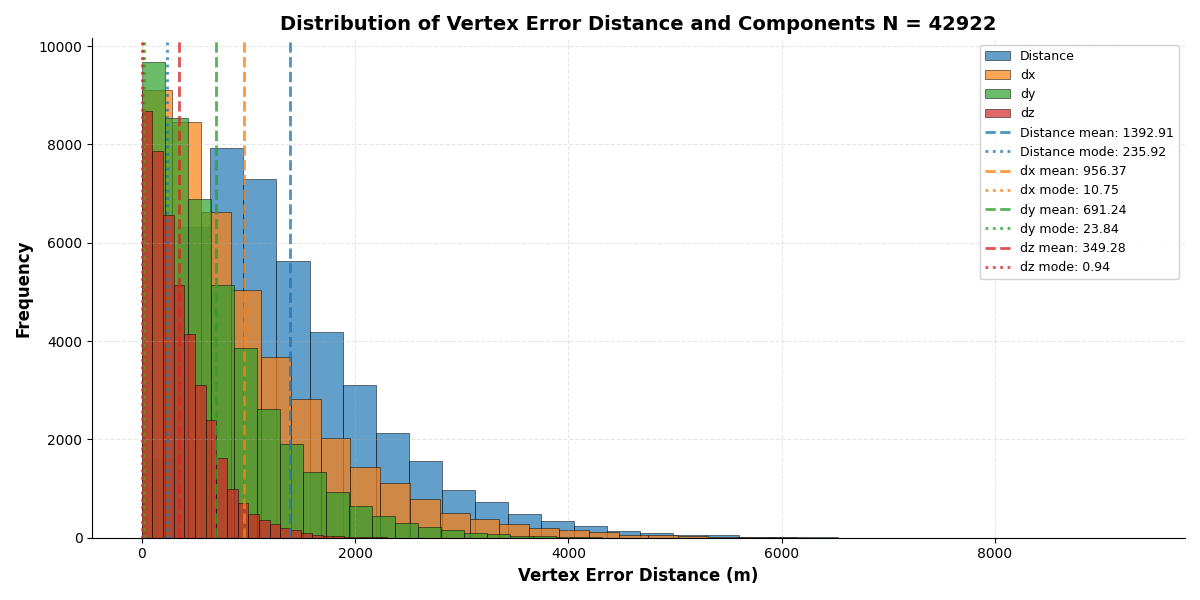

In [22]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

fig, ax = plt.subplots(figsize=(12, 6))

# Plot histograms with better styling
ax.hist(distances.dist, bins=30, alpha=0.7, label='Distance', edgecolor='black', linewidth=0.5)
ax.hist(distances.dx, bins=30, alpha=0.7, label='dx', edgecolor='black', linewidth=0.5)
ax.hist(distances.dy, bins=30, alpha=0.7, label='dy', edgecolor='black', linewidth=0.5)
ax.hist(distances.dz, bins=30, alpha=0.7, label='dz', edgecolor='black', linewidth=0.5)

# Calculate and plot mean lines
for data, color, label in zip(
    [distances.dist, distances.dx, distances.dy, distances.dz],
    ['C0', 'C1', 'C2', 'C3'],
    ['Distance', 'dx', 'dy', 'dz']
):
    mean_val = np.mean(data)
    mode_val = stats.mode(data, keepdims=True)[0][0]
    
    ax.axvline(mean_val, color=color, linestyle='--', linewidth=2, alpha=0.8, 
               label=f'{label} mean: {mean_val:.2f}')
    ax.axvline(mode_val, color=color, linestyle=':', linewidth=2, alpha=0.8,
               label=f'{label} mode: {mode_val:.2f}')

# Styling
ax.set_xlabel('Vertex Error Distance (m)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title(f'Distribution of Vertex Error Distance and Components N = {len(data_loader)}', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=9, framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

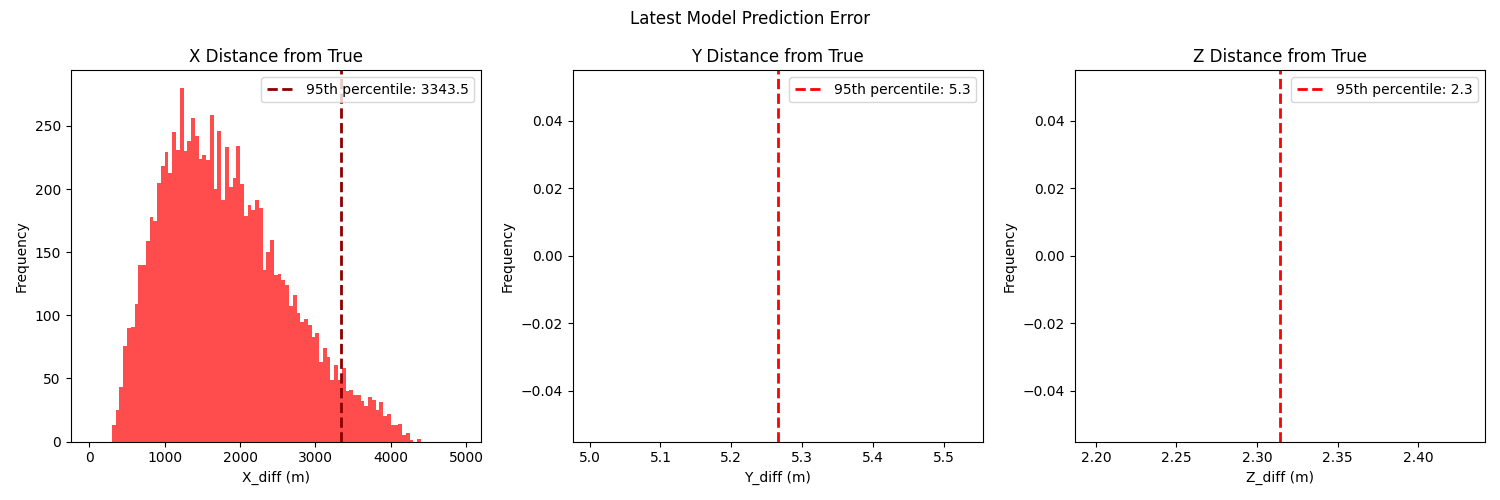

95% of R values are below: 3343.45
95% of Theta values are below: 5.27
95% of Phi values are below: 2.31


In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

bins_r = np.arange(0, 5000, 50)
bins_theta = np.arange(0,2*np.pi,50)
bins_phi = np.arange(0,np.pi,50)

# Calculate 95th percentiles
r_95th = np.percentile(r, 95)
theta_95th = np.percentile(theta, 95)
phi_95th = np.percentile(phi, 95)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Latest Model Prediction Error')

ax1.hist(x, bins=bins_r, alpha=0.7, color='red')
ax1.axvline(r_95th, color='darkred', linestyle='--', linewidth=2, label=f'95th percentile: {r_95th:.1f}')
ax1.set_xlabel('X_diff (m)')
ax1.set_ylabel('Frequency')
ax1.set_title('X Distance from True')
ax1.legend()

ax2.hist(y, bins=bins_theta, alpha=0.7, color='green')
ax2.axvline(theta_95th, color='red', linestyle='--', linewidth=2, label=f'95th percentile: {theta_95th:.1f}')
ax2.set_xlabel('Y_diff (m)')
ax2.set_ylabel('Frequency')
ax2.set_title('Y Distance from True')
ax2.legend()

ax3.hist(z, bins=bins_phi, alpha=0.7, color='blue')
ax3.axvline(phi_95th, color='red', linestyle='--', linewidth=2, label=f'95th percentile: {phi_95th:.1f}')
ax3.set_xlabel('Z_diff (m)')
ax3.set_ylabel('Frequency')
ax3.set_title('Z Distance from True')
ax3.legend()

plt.tight_layout()
plt.show()

print(f"95% of R values are below: {r_95th:.2f}")
print(f"95% of Theta values are below: {theta_95th:.2f}")
print(f"95% of Phi values are below: {phi_95th:.2f}")

---

In [ ]:
# Import data_analysis_utils (INCLUDES ALL OTHER UTILS!)
from data_analysis_utils import *
from torch.utils.data import DataLoader

album = AlbumDataset('/i3store/users/ssued/albums/album.hdf5', transform=None, target_transform=None)
data_loader = DataLoader(dataset = album, batch_size = 1, shuffle = True)

x_rand,y_rand,z_rand = obtain_random_average_prediction_distance(data_loader,limit=10_000)

  0%|          | 0/102678 [00:00<?, ?it/s]

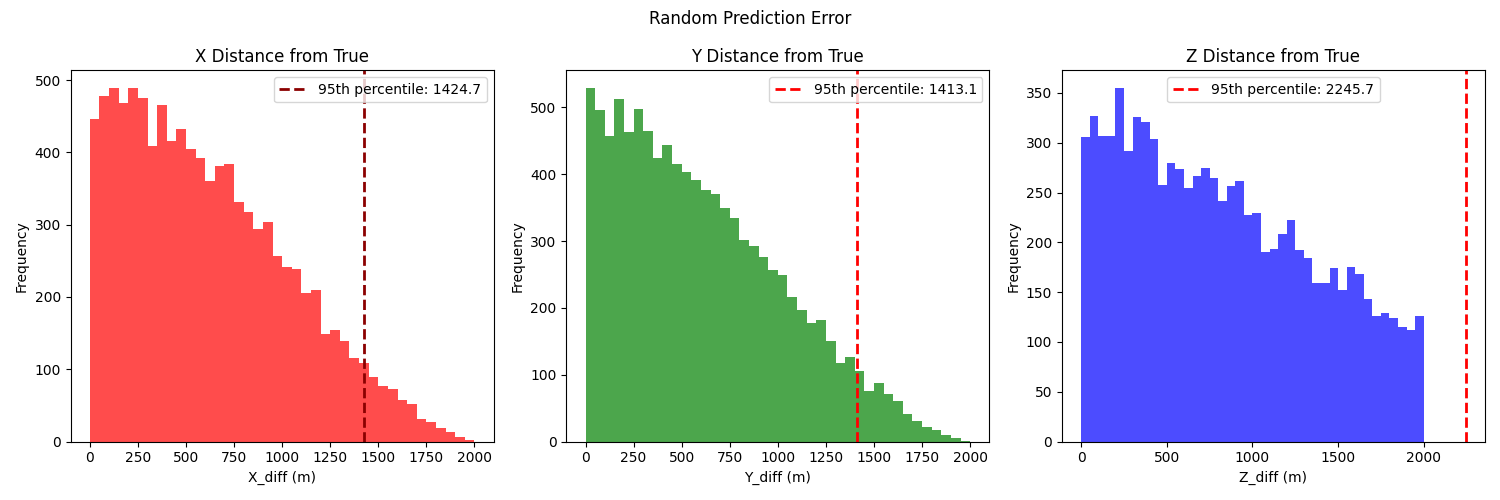

95% of X values are below: 1424.74
95% of Y values are below: 1413.07
95% of Z values are below: 2245.67


In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

bins = np.arange(0, 2050, 50)

# Calculate 95th percentiles
r_95th = np.percentile(x_rand, 95)
theta_95th = np.percentile(y_rand, 95)
phi_95th = np.percentile(z_rand, 95)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Random Prediction Error')

ax1.hist(x_rand, bins=bins, alpha=0.7, color='red')
ax1.axvline(r_95th, color='darkred', linestyle='--', linewidth=2, label=f'95th percentile: {r_95th:.1f}')
ax1.set_xlabel('X_diff (m)')
ax1.set_ylabel('Frequency')
ax1.set_title('X Distance from True')
ax1.legend()

ax2.hist(y_rand, bins=bins, alpha=0.7, color='green')
ax2.axvline(theta_95th, color='red', linestyle='--', linewidth=2, label=f'95th percentile: {theta_95th:.1f}')
ax2.set_xlabel('Y_diff (m)')
ax2.set_ylabel('Frequency')
ax2.set_title('Y Distance from True')
ax2.legend()

ax3.hist(z_rand, bins=bins, alpha=0.7, color='blue')
ax3.axvline(phi_95th, color='red', linestyle='--', linewidth=2, label=f'95th percentile: {phi_95th:.1f}')
ax3.set_xlabel('Z_diff (m)')
ax3.set_ylabel('Frequency')
ax3.set_title('Z Distance from True')
ax3.legend()

plt.tight_layout()
plt.show()

print(f"95% of X values are below: {r_95th:.2f}")
print(f"95% of Y values are below: {theta_95th:.2f}")
print(f"95% of Z values are below: {phi_95th:.2f}")

---

In [ ]:
# Import data_analysis_utils (INCLUDES ALL OTHER UTILS!)
from data_analysis_utils import *
from torch.utils.data import DataLoader

album = AlbumDataset('/i3store/users/ssued/albums/album.hdf5', transform=None, target_transform=None)
data_loader = DataLoader(dataset = album, batch_size = 1, shuffle = True)

untrained_model = VertexFinder1_0_0(input_shape=1,
                          hidden_units=10, 
                          output_shape=3,
                          num_epochs=1,
                          batch_size=1,
                          num_train_batches=1
                         )

x_unt,y_unt,z_unt = obtain_average_prediction_distance(untrained_model,data_loader,10_000)

  0%|          | 0/102678 [00:00<?, ?it/s]

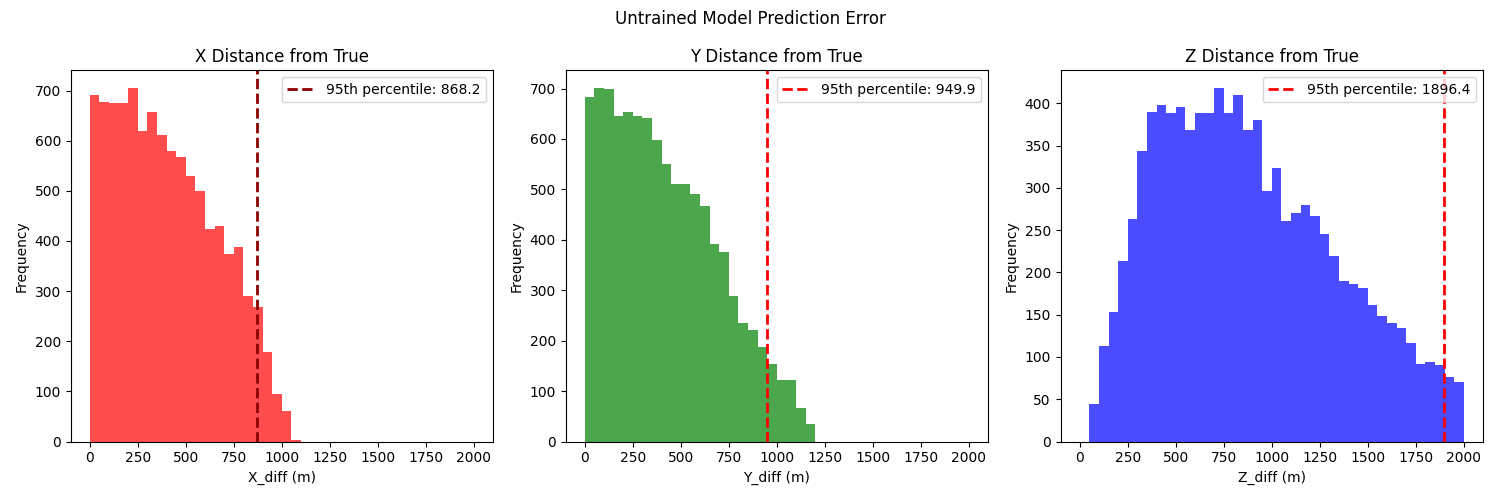

95% of X values are below: 868.24
95% of Y values are below: 949.92
95% of Z values are below: 1896.37


In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

bins = np.arange(0, 2050, 50)

# Calculate 95th percentiles
r_95th = np.percentile(x_unt, 95)
theta_95th = np.percentile(y_unt, 95)
phi_95th = np.percentile(z_unt, 95)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Untrained Model Prediction Error')

ax1.hist(x_unt, bins=bins, alpha=0.7, color='red')
ax1.axvline(r_95th, color='darkred', linestyle='--', linewidth=2, label=f'95th percentile: {r_95th:.1f}')
ax1.set_xlabel('X_diff (m)')
ax1.set_ylabel('Frequency')
ax1.set_title('X Distance from True')
ax1.legend()

ax2.hist(y_unt, bins=bins, alpha=0.7, color='green')
ax2.axvline(theta_95th, color='red', linestyle='--', linewidth=2, label=f'95th percentile: {theta_95th:.1f}')
ax2.set_xlabel('Y_diff (m)')
ax2.set_ylabel('Frequency')
ax2.set_title('Y Distance from True')
ax2.legend()

ax3.hist(z_unt, bins=bins, alpha=0.7, color='blue')
ax3.axvline(phi_95th, color='red', linestyle='--', linewidth=2, label=f'95th percentile: {phi_95th:.1f}')
ax3.set_xlabel('Z_diff (m)')
ax3.set_ylabel('Frequency')
ax3.set_title('Z Distance from True')
ax3.legend()

plt.tight_layout()
plt.show()

print(f"95% of X values are below: {r_95th:.2f}")
print(f"95% of Y values are below: {theta_95th:.2f}")
print(f"95% of Z values are below: {phi_95th:.2f}")